In [2]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

def oerorr(oer, orr):
    return(oer/orr)

total moles of gas consumed: 35.62421206342779
total moles of gas evolved: 33.56922371513107
charge cap= 0.9418828702635235
oer/orr: 0.9428973552541317
final current= 0.0050206496000000005
total moles of gas consumed: 29.034589777580948
total moles of gas evolved: 28.18867861479437
charge cap= 0.7797038099832005
oer/orr: 0.9704106740966532
final current= 0.0050371946
total moles of gas consumed: 25.199286320033735
total moles of gas evolved: 24.45427587456335
charge cap= 0.6783066151870621
oer/orr: 0.970687701474058
final current= 0.0050219222999999995


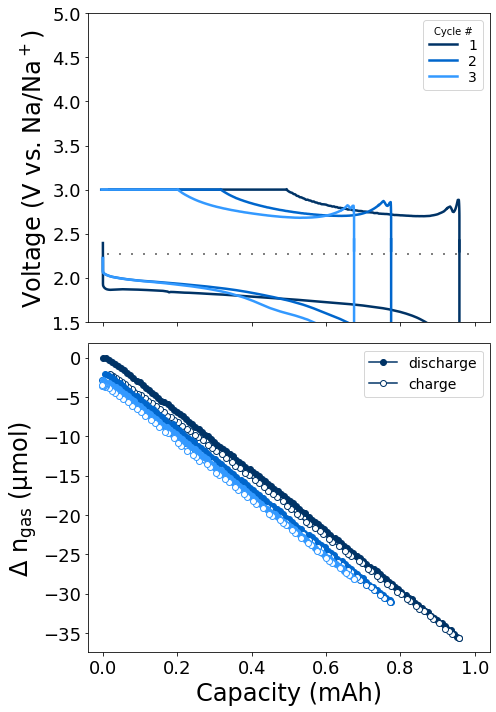

In [3]:
def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0):
    
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='')
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2, label='')
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.012), label='')
    #ax2.plot(x,y, 'k-',  c='#606060', linestyle='--', label= '',linewidth= 1)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([1.5,5])
    ax.set_xlim([-0.04,1.04])
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy1_Ch2__2019-10-15_12.47_45.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy2_Ch2__2019-10-16_11.41_02.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy3_Ch2__2019-10-17_09.47_00.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy4_Ch2__2019-10-17_16.07_50.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, '#0066CC', offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3, '#3399FF',offset=o1+o2)
#plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)


ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)






total moles of gas consumed: 36.38114037646295
total moles of gas evolved: 34.73002650535854
charge cap= 0.9758262460430462
oer/orr: 0.9545110592578048
final current= 0.0050650313
total moles of gas consumed: 37.661993237214276
total moles of gas evolved: 36.06346862609726
charge cap= 1.018263974951373
oer/orr: 0.9568417048012686
final current= 0.0050860196
total moles of gas consumed: 37.389939961018825
total moles of gas evolved: 35.73678320581982
charge cap= 1.018167303668128
oer/orr: 0.9574493418733722
final current= 0.0050593079


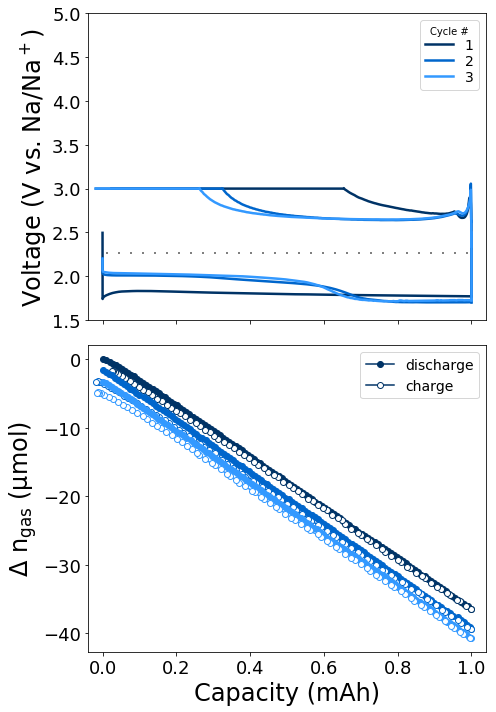

In [54]:
PTFEfolder = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/')
lowbinder1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/200119_10%binder_MCMB1202_cycling_CA_cell1_cycle1_Ch1__2020-01-19_12.06_04.txt')
lowbinder2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/200119_10%binder_MCMB1202_cycling_CA_cell1_cycle2_Ch1__2020-01-20_10.20_39.txt')
lowb3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/200119_10%binder_MCMB1202_cycling_CA_cell1_cycle3_Ch1__2020-01-20_23.32_24.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
p1=plot_CA_cycles(PTFEfolder[1], PTFEfolder[3], PTFEfolder[4], PTFEfolder[5], lowbinder1, 1, 1,'#003366' )
p2=plot_CA_cycles(PTFEfolder[8], PTFEfolder[10], PTFEfolder[11], PTFEfolder[12], lowbinder2, 1, 2, '#0066CC', offset=p1)
p3= plot_CA_cycles(PTFEfolder[15], PTFEfolder[17], PTFEfolder[18], PTFEfolder[19], lowb3, 1, 3, '#3399FF',offset=p1+p2)

ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200119_10%binder_MCMB1202_cycling_CA_cell1/lowPTFEbinder_cell1_CA_cycling.png', transparent = True, dpi=600, bbox_inches='tight')





In [49]:
def plot_na_CA(discharge, cp1, cp2, ca, press, ch, c, leg=None):
    #set number e- per process
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current: ' + str(i_ch) + 'mA')
    if leg == None:
        leg=''
    
    #cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1] #+cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    
    cap = []
    curr = []

    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) ##### add cp2
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    #st3=cp2['time/s'].iloc[0]
    #end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1]]#, cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    fig, (ax, ax3)= plt.subplots( 2, figsize= (9,9)) 
    ax2=ax.twinx()
    
    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], color='#003366', label=leg, linewidth=2.5)
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color='#003366', label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color='#003366', label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color='#003366', linewidth=2) 
    ax.plot([0.01, end_cap[0]],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2)
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    #st_p3 = getnearpos(press['time/s'],st3)
    #end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]

    
    x=[0, end_cap[0]]
    y=[0,-end_cap[0]*3.6/n/96485*10**6]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]

    ax2.plot(x,y, 'k-', linewidth=2, label= str(n)+' e$^-$/O$_2$')
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1],  'o-', color='#0066CC', linewidth=1.5, markersize=6, markevery=(0.0,0.012), label='')
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles']+pressure_gap)[st_p2:end_p4-1],  'o-', color='#0066CC', linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.012), label='')  
    #ax2.plot( [0.025], [-0.5746], 'o', color='orange')

    #recomment again
    ax3.plot(end_cap[0] - cp1['Capacity/mA.h'], cp1['I/mA'], '-', color='#003366', markersize=2, linewidth=2.5)
    #ax3.plot(end_cap[0] - cp2['Capacity/mA.h'], cp2['I/mA'], '-', color='xkcd:green', markersize=2)
    ax3.plot(end_cap[0] - ca['Capacity/mA.h'], ca['I/mA'], '-', color='#003366', markersize=2,linewidth=2.5)
    
    ax3.set_ylabel('Current (mA)', fontsize=20)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=20)
    ax2.set_ylabel('n$_{gas}$ ($\mu$mol)', fontsize=20)
    ax3.set_xlabel('Capacity (mAh)', fontsize=20)
    #ax2.legend(fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='y', which='major', labelsize=15)
    ax3.tick_params(axis='both', which='major', labelsize=18)
    plt.tight_layout()
    ax.set_ylim([0.8,4])
    ax2.set_xlim( [-0.02, 0.52])
    ax3.set_xlim( [-0.02, 0.52])
    
    return ()

In [1]:
pvdf = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200120_10%pvdf_MCMB0117_cycling_CA_cell1/')
pvdfp = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200120_10%pvdf_MCMB0117_cycling_CA_cell1/200120_10%pvdf_MCMB0117_cycling_CA_cell1_cycle1_Ch2__2020-01-20_15.13_29.txt')
plot_na_CA(pvdf[1], pvdf[3], pvdf[4], pvdf[5], pvdfp, 2, 'b' )

plt.figure()
plt.plot(pvdfp['time/s'], pvdfp['pressure/torr'])


pvdf2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200120_10%pvdf_MCMB0117_cycling_CA_cell2/')
pvdf2p = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200120_10%pvdf_MCMB0117_cycling_CA_cell2/200120_10%pvdf_MCMB0117_cycling_CA_cell2_cycle1_Ch4__2020-01-20_14.39_14.txt')
plot_na_CA(pvdf2[1], pvdf2[3], pvdf2[4], pvdf2[5], pvdf2p, 4, 'b' )

plt.figure()
plt.plot(pvdf2p['time/s'], pvdf2p['pressure/torr'])


lowbinderCA = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CA/200114_10%binder_MCMB1202_cycling_CA_cycle1_Ch1__2020-01-14_17.58_13.txt')
lowbinder = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CA/')
plot_na_CA(lowbinder[1], lowbinder[3], lowbinder[4], lowbinder[5], lowbinderCA, 1, 'b')




NameError: name 'folder_files' is not defined